In [27]:
import sklearn
import pandas as pd
import numpy as np
sklearn.__version__

'1.2.2'

### Linear Regression

In [7]:
df = pd.read_csv('../data/LinearRegressionData.csv')

In [8]:
df.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [9]:
X = df.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지 - 독립 변수 
y = df.iloc[:, -1].values # 마지막 컬럼 데이터 - 종속변수 

In [12]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X,y) # 데이터 학습 => 모델 생성

LinearRegression()

In [29]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

Text(0, 0.5, 'Score')

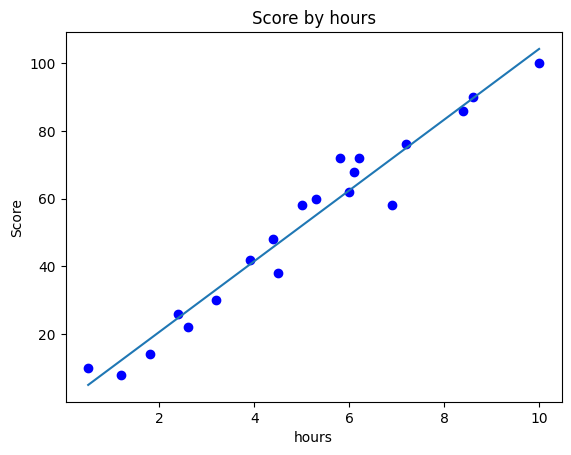

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X,y, color ="blue") # 산점도
plt.plot(X, y_pred) # y_pred 선그래프
plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("Score")

In [36]:
print("각 시간별 공부 시에 예측 점수 : ", reg.predict([[5],[6],[9]]) )

각 시간별 공부 시에 예측 점수 :  [52.         62.44369694 93.77478776]


In [37]:
reg.coef_ # 기울기 (m)

array([10.44369694])

In [39]:
reg.intercept_ # y 절편(b) 

-0.218484702867201

y = mx +b -> 10.4437x - 0.2185

### 데이터 세트 분리

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('../data/LinearRegressionData.csv')
df

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [3]:
X = df.iloc[:, : -1].values
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) # 80:20 분리

In [7]:
X,len(X) # 데이터 x 와 갯수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [8]:
X_train, len(X_train) # 훈련세트 확인

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [9]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [11]:
y,len(y)

(0      10
 1       8
 2      14
 3      26
 4      22
 5      30
 6      42
 7      48
 8      38
 9      58
 10     60
 11     72
 12     62
 13     68
 14     72
 15     58
 16     76
 17     86
 18     90
 19    100
 Name: score, dtype: int64,
 20)

In [13]:
y_train,len(y_train)

(10    60
 17    86
 6     42
 13    68
 4     22
 2     14
 5     30
 14    72
 9     58
 7     48
 16    76
 11    72
 3     26
 0     10
 15    58
 12    62
 Name: score, dtype: int64,
 16)

In [10]:
y_test,len(y)

(18     90
 1       8
 19    100
 8      38
 Name: score, dtype: int64,
 20)

### 분리된 데이터를 통한 모델링

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [16]:
reg.fit(X_train,y_train)

LinearRegression()

#### 훈련데이터 시각화

Text(0, 0.5, 'Score')

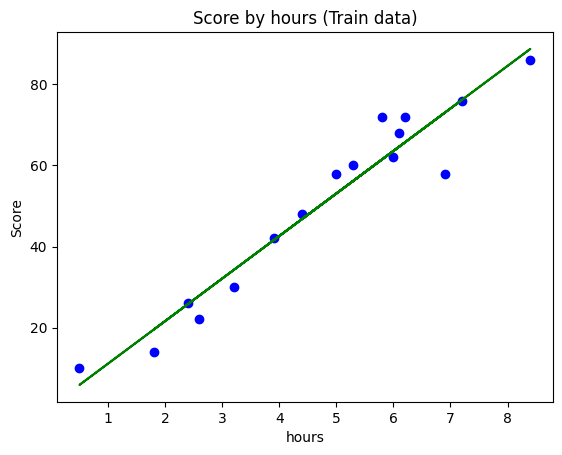

In [21]:
plt.scatter(X_train, y_train, color ="blue") # 산점도
plt.plot(X_train, reg.predict(X_train), color = 'green') # X_train 선그래프
plt.title("Score by hours (Train data)")
plt.xlabel("hours")
plt.ylabel("Score")

#### 테스트 데이터 시각화

Text(0, 0.5, 'Score')

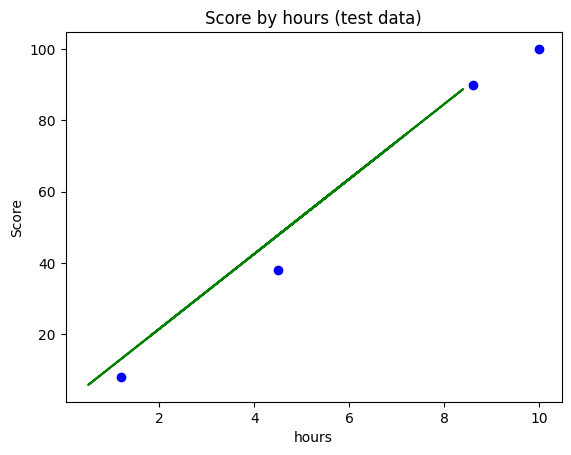

In [22]:
plt.scatter(X_test, y_test, color ="blue") # test 데이터 산점도
plt.plot(X_train, reg.predict(X_train), color = 'green') # X_train 선그래프
plt.title("Score by hours (test data)")
plt.xlabel("hours")
plt.ylabel("Score")

In [23]:
reg.coef_

array([10.49161294])

In [24]:
reg.intercept_

0.6115562905169369

### 모델 평가

In [25]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [26]:
reg.score(X_train, y_train) # 훈련세트 모델 평가

0.9356663661221668